The lab_black extension is already loaded. To reload it, use:
  %reload_ext lab_black
Weak:  680 		 0.7991652014705882
No Weak:  9320 		 0.7953966150214592


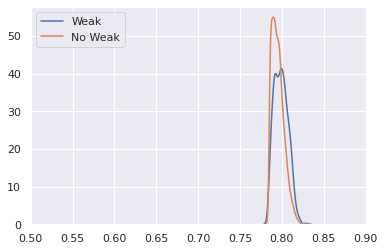

In [139]:
%load_ext lab_black
import pickle
from tabulate import tabulate
from IPython.core.display import display, HTML
import pandas as pd
import seaborn as sns, numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

sns.set()
rug = False
bins = 50
# code refactoren und eine funktion drauß machen
# filterung der datentypen refactoren
# so filtern, dass nur die true weaks dabei sind, und davon auch nur die, welche vielversprechende parameterkombinationen enthalten
# bzw. dann auch mal false weaks beibehalten -> es ist keine Erfolgsgarantie!
# ---> Untersuchung, dass ich die Parameter für die Trennung der beiden Bereiche so lange ausprobiere, bis ich den perfekten Wertebereich der Parameter gefunden habe
# -> early Ergebnis an Maik senden


with open("200er_results.pickle", "rb") as f:
    table = pickle.load(f)

df = pd.DataFrame(table)


def compare_two_distributions(
    df, selection1, selection2, label1, label2, bins=50, rug=False, axvline=False
):
    ax1 = sns.kdeplot(
        selection1,
        label=label1,
        # rug=rug,
        # bins=bins,
    )
    print(
        label1 + ": ", len(selection1), "\t\t", selection1.mean(),
    )
    ax1.set_xlim(0.5, 0.9)
    if axvline:
        ax1.axvline(selection1.mean())
    # plt.show()
    # plt.clf()

    print(
        label2 + ": ", len(selection2), "\t\t", selection2.mean(),
    )
    ax2 = sns.kdeplot(
        selection2,
        label=label2,
        # rug=rug,
        # bins=bins,
    )
    ax2.set_xlim(0.5, 0.9)

    if axvline:
        ax2.axvline(selection2.mean())
    plt.show()


compare_two_distributions(
    df,
    df.loc[df["interesting?"] == True]["acc_test"],
    df.loc[df["interesting?"] == False]["acc_test"],
    "Weak",
    "No Weak",
)


# display(HTML(tabulate(table, headers="keys", tablefmt="html")))

Weak:  680 		 0.7991652014705882
No Weak:  9320 		 0.7953966150214592


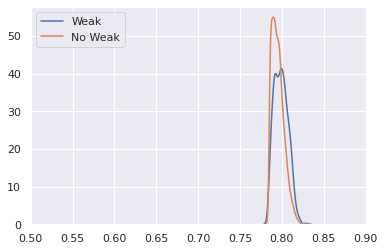

In [140]:
compare_two_distributions(
    df,
    df.loc[df["weak?"] == True]["acc_test"],
    df.loc[df["weak?"] == False]["acc_test"],
    "Weak",
    "No Weak",
)

Weak:  1980 		 0.7986519848484849
No Weak:  8020 		 0.7949124512468828


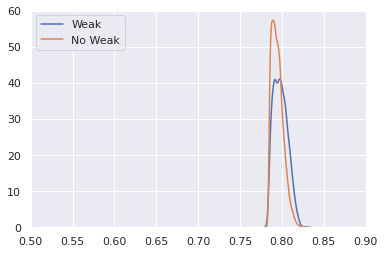

In [141]:
compare_two_distributions(
    df,
    df.loc[df["acc_test_all_better?"] == True]["acc_test"],
    df.loc[df["acc_test_all_better?"] == False]["acc_test"],
    "Weak",
    "No Weak",
)

Weak:  3245 		 0.7956590221879815
No Weak:  6755 		 0.7956499277572168


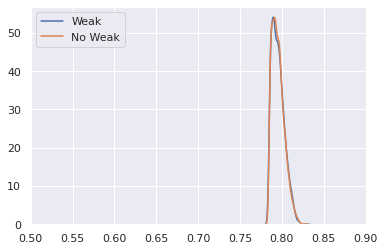

In [142]:
compare_two_distributions(
    df,
    df.loc[df["true_weak?"] == True]["acc_test"],
    df.loc[df["true_weak?"] == False]["acc_test"],
    "Weak",
    "No Weak",
)

In [143]:
display(HTML(tabulate(table[0:100], headers="keys", tablefmt="html")))

id,param_list_id,weak?,acc_test_all_better?,true_weak?,interesting?,acc_test_oracle,acc_test,fit_score,fit_time,amount_of_all_labels,amount_of_user_asked_queries,sampling,cluster,with_uncertainty_recommendation,with_cluster_recommendation,uncertainty_recommendation_certainty_threshold,uncertainty_recommendation_ratio,cluster_recommendation_minimum_cluster_unity_size,cluster_recommendation_ratio_labeled_unlabeled,allow_recommendations_after_stop,experiment_run_date
0,86b7c4fbef8226321048a5d3c8802403,True,True,True,True,0.824507,0.829007,0.875396,21.1925,224,210,uncertainty_max_margin,dummy,False,True,0.9,0.01,0.85,0.6,True,2020-05-28 11:26:00.174631
1,22d96ff18921c1ba70deb8c29c251a76,False,False,False,False,0.832122,0.828314,0.87501,16.0198,214,210,uncertainty_max_margin,dummy,False,False,0.89,1e-06,0.88,0.82,True,2020-05-28 16:06:31.307841
2,80bd803ab28d606ef02d1e3079be6577,False,True,False,False,0.819315,0.826584,0.874043,16.0224,214,210,uncertainty_max_margin,dummy,True,True,0.87,1e-05,0.98,0.73,True,2020-05-28 13:58:34.045357
3,441cee12ff1a846377ac3676d676be90,False,False,False,False,0.828314,0.826584,0.874043,18.566,214,210,uncertainty_max_margin,dummy,True,False,0.98,0.01,0.8,0.79,True,2020-05-28 15:34:39.763004
4,301ef9fa361fef2436ce2605eafccf9e,False,False,False,False,0.824161,0.823468,0.872299,15.9817,214,210,uncertainty_max_margin,dummy,False,False,0.88,1e-05,0.77,0.66,True,2020-05-28 10:33:06.412298
5,89aca6bc2c6b7de40ef85560101b8048,False,False,False,False,0.823468,0.823468,0.872299,17.8942,214,210,uncertainty_max_margin,dummy,True,False,0.92,0.01,0.89,1,True,2020-05-28 09:17:21.139455
6,dfe7be7331f79b3e0fa8deae49db2354,False,False,False,False,0.824161,0.822776,0.87191,16.6183,214,210,uncertainty_max_margin,dummy,False,True,0.95,0.001,0.59,0.95,True,2020-05-28 12:52:41.596673
7,4a011d11c5c07b88ad4e4872283289a0,True,True,True,True,0.818968,0.821738,0.871327,22.8196,222,210,uncertainty_max_margin,dummy,True,True,0.96,1e-05,0.8,0.93,True,2020-05-28 13:10:38.942410
8,2ce0740f9cf8668cd523ae379926cb07,False,True,False,False,0.817238,0.821738,0.871327,15.2566,214,210,uncertainty_max_margin,dummy,False,False,0.97,0.0001,0.97,0.64,True,2020-05-28 11:27:34.358774
9,66ac40ff034c31474a810a79d7a6de68,False,False,False,False,0.821738,0.821391,0.871132,15.2211,214,210,uncertainty_max_margin,dummy,False,False,0.95,1e-06,0.81,0.54,True,2020-05-28 16:03:45.329047
